# <font color=red>Multiple Linear Regression Template</font> 

## <font color=blue>Business Problem Description</font> 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

#Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append( arr = np.ones((50, 1)).astype(int), values = X, axis = 1) 
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

C:\Users\TTAdmin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\TTAdmin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           3.50e-32
Time:                        23:52:23   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Finally we've come to our conclusion.


* We have five methods of building models.


* So the one way are going to be looking at in these tutorials in order to get our head around how to build models step by step and get some practice is the backward elimination process.


* Because it is the fastest one or all of them and you will still get to see exactly how the step by step method works.


* And plus we'll throw in a few extra tricks along the way to make sure our models are very robust.

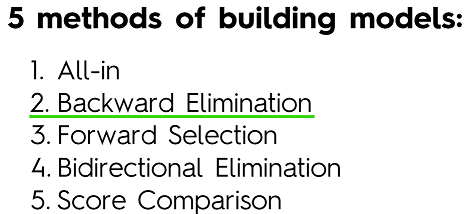

### Conclusion

* So this is the most probably resource consuming approach.


* Because you select a criterion of goodness of fit for instance that Akaike criterion can be the R-squared.


* Lots of different criterions then you construct all possible regression model.


* So if you had n variables and there'll be a two to the power of and minus one total combinations of these variables.


* That that's exactly how many models there can possibly be and then step three you select the one of these models with the best criterion that you're looking at.


* There you go your model is ready.


* It sounds easy, but let's have a look an example even if you have 10 columns in your data. 


* You'll have 1023 models. That's insane.


* That's an insane amount of models.


* And we're not talking about columns that you've already filter out. So columns that you know that like in our example you might have five or six columns.


* Now we're talking about when you get a data set that you need just is pretty much a rule and it has like maybe 100 columns.


* I've worked with data sets were around that maybe 50 to 100 maybe more columns and instead of going through them this is what this method is suggesting sort of going through them and picking out the ones that you think should be in the model.


* You just throw everything in.


* Well it's not a good approach because basically the number of models is growing exponentially.


* And it's very resource consuming to get a result from this approach.

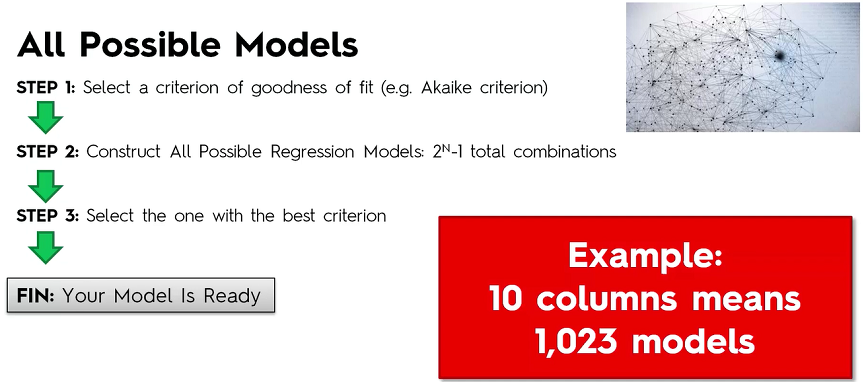

### 5. All Possible Models

* This one as you can assume combines the two step one.


* **Step-1**; select the `significance level (SL)` to stay or to enter and a significant level to stay.

  * We're going to select in both cases 0.05 but it's up to you what you select.
  
  
* **Step-2**; perform the next step of the forward selection meaning that the one that we just discussed.

  * So where new variables when they enter in order to be less than the significance level to enter.
  
  * So basically add on a new variable based on the forward selection method.


* **Step-3**; perform all of the steps of the backward elimination process. So now you should have two variables.

  * Start getting rid of them and see if you can get rid of any of them.
  
  
* **Move back to step 2;** so then grow by another variable.

  * And every time you grow a variable say let's say you were at five variables went to six. Since you went to six you have to form all the steps of backwardly mesh so you don't just eliminate one variable if you can eliminate one to three however many you can.
  
  * Then from there you go back to **Step 2**.
  
  * So this is a very iterative process.
  
* **Step-4**;  You keep doing that until at some point you cannot add new variables no variables can enter or no old variables can exit.

   * As soon as you get there.
   
   * Then you proceed to the finish because your model is ready to call.
   
   * You can't anything,  you can't take anything out that means you've you've created the model.
   
   
* So this is one of the more tedious methods. Of course you would have to get a computer to do this for you because otherwise you'd go insane putting variables in and taking them out.


* But that's how **bidirectional elimination works**.


* And once again some people call it **stepwise regression**.

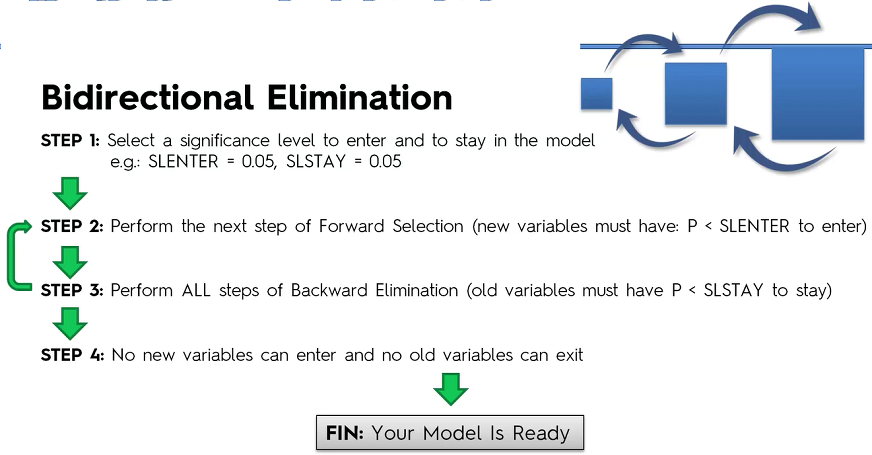

### 4. Bidirectional Elimination

* It sounds like `the opposite of backward elimination`. But it's a much more complex than just simply reversing the procedure.

* You will see that it's a much larger procedure.


* **Step-1**; select the `significance level (SL)` to enter the model.

  * in this case once again we're going to select 5 percent.


* **Step-2**; We fit all possible simple regression models.

  * So we take the dependent variable and we create a regression model with every single independent variable that we have.
  
  * And then we select out of all those models we select the one which has the lowest p value for the independent variable.
  
  * So you can already see that that is in itself a lot of work.


* **Step-3**; We keep this variable that we've just chosen and we fit all other possible models with one extra predicter added to the one we usually have. So what does that mean?
   
   * That means we've selected a simple linear regression with one variable.
   * Now we need to construct all possible linear regressions with two variables where one of those two variables is the one of various.
   * Basically we add on all of the other variables one by one, but separately .
   * So we construct all possible 2 variable linear regressions and just keeping definitely keeping the variable that we're very selected.


* **Step-4**; Out of all of these possible two variable regressions we consider the one where the new variable that we added had the lowest p value.

  * if that p value is less than our significance level meaning that you know that variables a good one it's a significant variable then we moved back to Step 3.
  
  * So what does that mean? Means that now we have a regression with two variables and now we will add a third variable.
  
  * We'll try all possible variables that we have left as our third variable and then out of all of those models with three variables.
  
  * We will go to Step 4 and we'll select again the one of the lowest p value for that third variable we added.
  
  * And We'll keep doing that. So basically we'll be keep growing the regression model but not just randomly will be actually selecting out of the all all of the possible combinations every single time and growing at one variable at a time.
  
  * Then we will only stop when the variable that we've added has a p value that is greater than our significance level.
  
  * So when **`P < SL`** is not true then we don't go to Step 3 we finished the regression.
  
  * Because that variable though we just added is not significant anymore.
  
  * And we also know that we selected the one with the lowest P-value. So there is no other variable that we can add that its P value will be less than SL.
  
  * Any regression which is from then onwards it will the variable the new variable will always be insignificant.
  
  * So here we finish the regression. And the trick here is that you keep not the current model but the previous one.
  
  * And that makes sense because you've just added a variable which is insignificant So what's the point of that variable just move a step back.
  

* So that's how forward selection works.

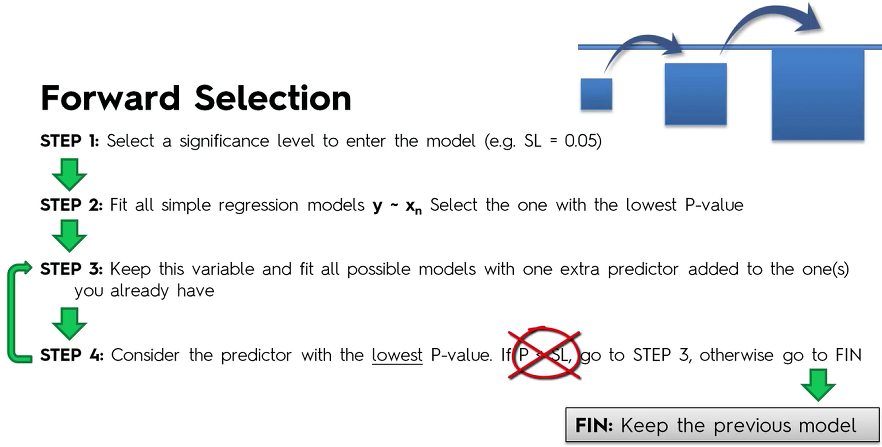

### 3. Forward Selection

* So here comes a step by step stuff you might want to get your pens out and write these things down.

* Because we're going to have a truly step by step method now.


* **Step-1**; you have to select a `significance level (SL)` to stay in the model.

  * So by default we're going to go with 5 percent so 0.05 and we're going to use it in the next step.
  * So it's at the beginning you decide on this significant level.
  
  
* **Step-2**; you fit the full model with all possible predicter.

  * So you kind of do that all in approach which we just talked about.
  * And you put all of your variables into your model.
  * Now we're going to start getting rid of them.


* **Step-3**; you considered the predicter with the highest P-value.

  * So remember those P-value that we talked about.
  * So after you fitted the model you'll see the one with the highest P value.
  * So if p is greater than your significance level then you go to Step 4.


* **Step-4**; you have to remove that predict to remove basically the variable that has the highest P value.


* **Step-5**; you fit the model without this variable so there's a star here.

  * Because I just wanted to remind myself to tell you that if you just remove the variable, Obviously you can just say that; OK, now I've got the new model.
  
  * You have to actually refit them all you have to re recreate them all,  rebuild it with the fewer number of variables.
  
  * So if you had maybe I don't know a hundred variables and you removed them one of them you have 99 now.
  
  * Well you have to rebuild it so the coefficients are going to be different. The constant is going to be different.
  
  * And you you need to perform that step because once you remove a variable it affects all the other variables in your whole regression.


* **Go back to Step-3**; And so after Step 5 you go back to Step 3.

  * Once again you look for the variable with the highest value in your new model.
  * You take it out you remove it.
  * So basically step 4 you remove it.
  * You fit the model again with one less variable.
  * And so on.

* And you keep doing that until you come to a point where the even the variable of the highest P value that p value is still less than your significance level.


* So if that condition **`P > SL`** is not correct then you don't go to Step-4 anymore. 

  * You go to **`FIN`** and this case of FIN is the finish.
  * Your model is ready.
  * So as soon as all of the variables that you have left in your model are there p values are less than the significance level. Your model is prepared.
  

* So that's how the backward elimination method works.

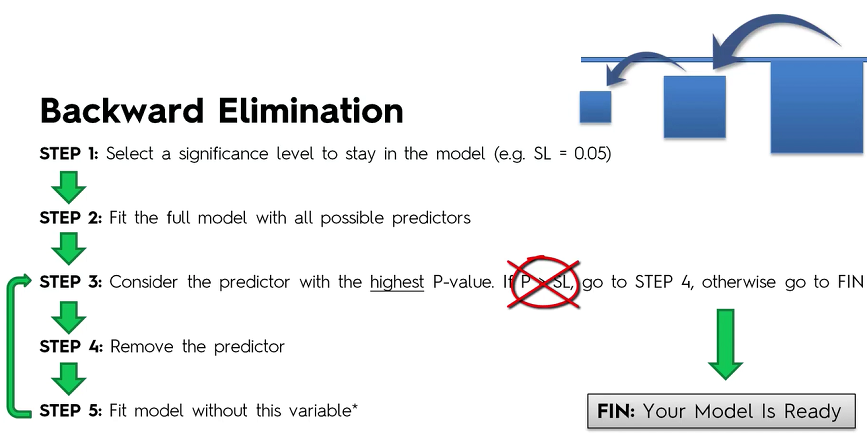

### 2. Backward Elimination

* It's not a technical term I just call it all in.

* Basically what it means is just throw in all your variables. Something we just discussed we shouldn't do.

* When would you do that;

  * Number 1 is if you have prior knowledge.
    
     - if you know that these exact variables are the ones are your true predictors.
     - You don't have to build anything you already know that this is the case.
     - You might know it from domain knowledge or you might know it because you've done this model before.
     - Or somebody just gave you these variables and said please build a model. Well then you don't really have a choice. You just build the model.
     
  * Number 2 is you have to perhaps like I can't really think of good examples here but maybe there's some framework in your company that says that you have to use these variables right.
  
     - So it's kind of similar to prior knowledge but it's not your decision. You might want to do it differently but there is a framework.
     - You know like maybe a bank. 
     - And to predict credit like with the likelihood of somebody defaulting on something they have to use the superballs.
     - Once again I'm not sure in which industries that would be the case but perhaps that could be the case.
   
   * Number 3, you would use this method if you're preparing for a backward elimination type of construction of regression which is our next type.

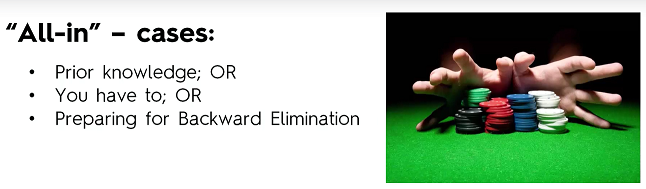

### 1. All-in Cases

* So how do we construct a model. This is the process of building the model selecting the right variables.


* Well there are five methods that we're going to discuss of building models.


* We're going to talk about each one of them just now before we do I wanted to say that sometimes you'll hear stepwise regression. 

  * So stepwise regression actually refers to **`number 2 3 and 4`** because as it likes really the the true step by step methods.
  
  * But sometimes you will hear people say stepwise regression in reference to just **`number 4`**. so there will replays be **`bidirectional elimination`** of stepwise regression and that's fine that's that's normal that's just because that's the more as you'll see from what we discuss. they kind of by default imply that is bi directional elimination and you have to inferred from there.


* So let's move on to our methods.

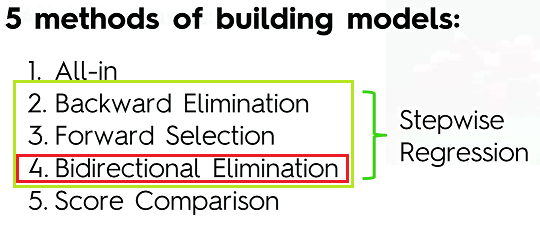

* Number one is garbage in garbage out.

  * If you throw in a lot of stuff into your model then your model will not be a good model it won't be reliable it won't be doing what it's supposed to be doing is going to be a garbage model.
  
* And number two at the end of the day you're going to have to explain these variables and understand the not just the math behind them but actually what it means that certain variables predict the behaviorof your dependent variable. 

  * And you will have to explain that to your executives, to your boss, to people.
  * So if you have a thousand variables is not going to be practical to try and explain that.
  * So you want to keep only the very important ones the ones that actually predict something.

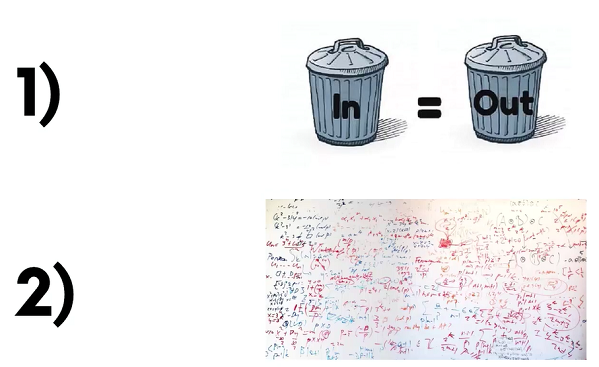

* And you'll ask why do we need to throw out columns or do we need to get rid of data? why can't we just use everything in our model?

* Well I can think of two reasons of the top of my head.

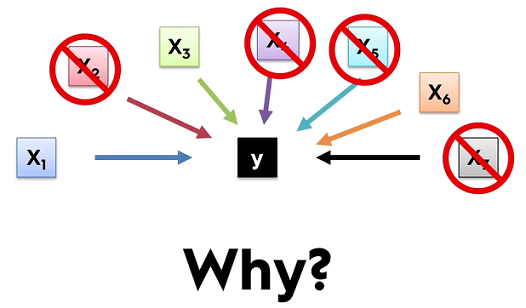

* But now in our data we have all these columns. Those easy days are gone now all of these columns are potential predictors for a dependent variable.

* and there's just so many of them and we need to decide which ones we want to keep and which ones we want to throw out.

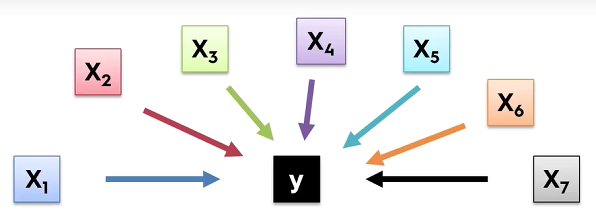

* Do you remember the good old days when we had one dependent variable and one independent variable. Everything was easy and we just had a simple linear regression that we had to build and everything worked great.

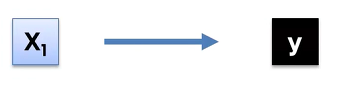

* I had to add that extra line step by step to the name of the tutorial because that is exactly what we're going to be looking at.

* I'm going to give you a framework for several different methods and it's all going to be step by step.

## <font color=blue>Multiple Linear Regression Intiution-Step 5 Building A Model Step by Step</font> 

**<a href="https://www.wikihow.com/Calculate-P-Value">Explanation-2</a>**

**<a href="https://www.mathbootcamps.com/what-is-a-p-value/">Explanation-1</a>**

* before we get into Backward Elimination, make sure to be introduced to the p-value and have a basic understanding of how it works. By looking at almost all the explanations of the p-value on the internet, we have selected for you the two best ones:

## <font color=blue>Prerequisites: What is the P-Value?</font> 

* So to sum up whenever you're building a model **always omit one dummy variable**. And this applies irrespective of the number of dummy variables they are in that specific dummy set.

  * If you have 9 dummy variables then you should only include 8.

  * if you have 100 dummy variables then you should only include 99.
  
* Also note that if you have two sets of dummy variables then you need to apply the same rule to each set.

* For instance we could have had a column which specifies the industry in which the companies operate. To build the model in that case we would have had to perform exactly the same steps and create another set of dummy variables specifically for that column. And then we would include all but one of those dummy variables in our actual model.

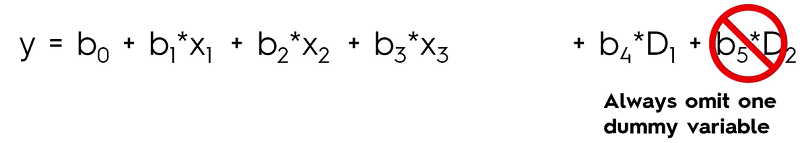

* If you do the math behind this scenario you will see that the real problem is that you cannot have these three elements in your model at the same time the constant and both the dummy variables.

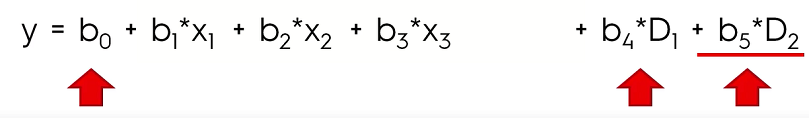

* The intuition here is that you're basically duplicating a variable.

  * This is because D2 always equals to one minus D1 the phenomenon where one or several independent variables in a linear regression predict another is called multicollinearity.
  
  * As a result of this effect the model cannot distinguish between the effects of D-1 from the effects from D2. And therefore it won't work properly.
  
  * And this is called the `dummy variable trap`.

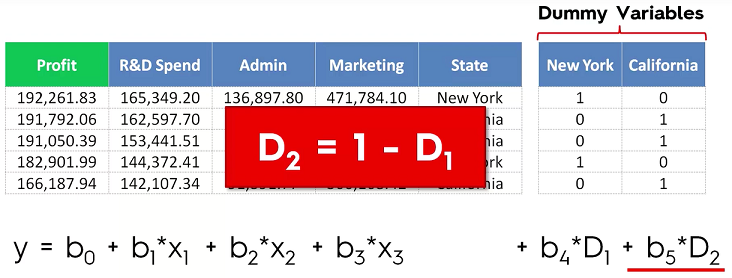

* We learn how to create dummy variables to replace our categorical predictors state in the model.

* We also discussed that you can never include both dummy variables at the same time.

* In our example we admitted the California dummy. 

  * Now why is that?

  * What will happen if we include the second dummy variable in the model as well?

## <font color=blue>Multiple Linear Regression Intiution-Step 4</font> 

* First you need to go through your column and find all the different categories you have. So in this case we have two categories.

* So for every single category that you followed you need to create a new column for New York we're going to create a column called New-York and  for California create a column California. 

* So we're kind of expanding our data set and adding some additional columns into it.

* And how do we populate the column.

* So this is the fun part. To populate these columns;

  * Lets start with NewYork, you need to find all of your rows where the state actually says New York and you need to for those rows put a 1 in the column.
  * And then for the column California you do the same thing.
  * And so you end up with a data set like this and these two new columns are called dummy variables.

* And building your regression model from here is very simple. 

* All you have to do is use the New York column and you're going to be using it instead of states. You won't be using state anymore.

* Basically you add a variable which is b4 times D1.

* D1 in this case is your dummy variable for New York and you don't use the California column either.

* So as you can see here all the information in our data is preserved if we just stick to the one New York column because you can tell right away;
  * If D1 is a 1 then it's a company that works and it operates in New York.
  * If D1 is a 0 it's a company that operates in California.
  * So we didn't lose any information by including only the New York column.

* And we will actually talk more about why you should never include all of your dummy variable columns in your regression model.

* But for now I would like to discuss two things.

  * First of all the New York column or all of the dummy variables they work as switches.
     - In this case let's look at the New York column which we're including in our regression.
     - It works like a light switch so `if it's a 1` then you know **the switch is on** and that this company is in New York. `If it's a 0` then you know **the switch is off**  then you know that the company doesn't work in New York option. 
     - So the dummy variables work like light switches. And that's why they're ones and zeros and they don't need any other values in them.
  
  * The second thing is that when you look at this approach it might seem biased.
     - So we are including a variable for New York and there's a coefficient for New York so we basically have this benefit of having a coefficient in our equation for New York.
     - But for California there's no coefficient because when D1 is zero that whole loss part of the equation becomes zero and there's no benefit of a coefficient in our equation for California and might seem biased at first.
     - But in reality that's not the case because the way regression models work is that they will take by default that state or that variable that dummy variable that you have not included will become the default situation for this regression model.
     - So basically what that means is that the coefficient for California is going to be included in the constant, in b0.
     - And by default when D1 is equal to zero this whole equation will turn into an equation you can think of it as it'll turn into equation for California.
     - But then when D1 becomes 1 you're adding before which is once again like this is a very basic explanation but you're adding a coefficient which is the difference between New York and California.
     - So basically you're altering from California to New York by flipping this light switch. If it's on off, then kind of default state and the whole equation is working for California. If it's on on then by adding that before you're altering the equation from the default state of California.
     
  * So that's a intuitive way to think of dummy variables so there's nothing wrong with the fact that we're only including one and once again in the next tutorial We'll talk more about why it is a bad idea to include both dummy variables.

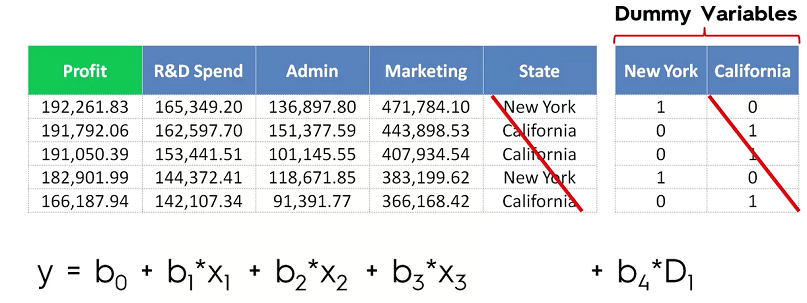

* As we would build multiple linear regression we would start by saying Y which is profit is equal to what.

  * First of all there is a constant in this case it's b0.
  * then we would start adding on these variables into our equation.
  * So then we've got the b1 coefficient times the x1 variable which is R&D spend. In this case, x1 is actually the amounts the dollar amount that you see in the R&D column.
  * Then the Admin variable which is x2. It's got a coefficient of b2. In this case x2 is going to be the dollar amount you see in the admin column.
  * Then the marketing spend x3 with coefficient b3 which will be the dollar amount you see in the marketing column.
  * Then you've got the state variable and here when we get here we're questioning what should we place in our equation for the state column because we don't actually have a number we don't have a dollar value or any other type of number to add into our equation or we can just add a word into the equation.

* And the thing here is that the state is actually a categorical variable so we talked about types of variables before and we understood that there's categorical variables and there's numeric variables.

* Well in this case state is a categorical variable and therefore we can't add it to our equation.

* We need to do something about this situation and the approach that you need to take when you face categorical variables in regression models is you need to create dummy variables.

* Let's see how we we can do that.

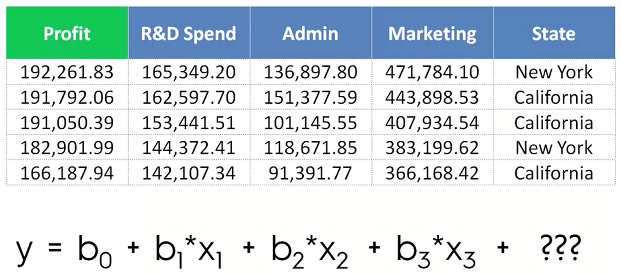

* The challenge that we're faced with is that the venture capitalist Fund wants to see if there's any correlations between profit and the amounts that have been spent on different expenses R&D, Admin and Marketing and also with in which state the company operates.

* Is there a correlation between profit and all these variables and how would you go about creating a model to understand how knowing R&D spend admin and marketing and state to predict profit.

* So therefore profit is our dependent variable and the rest the blue ones are all independent variables.

* And what we need to do is build a linear regression.

* So let's go ahead and get started.

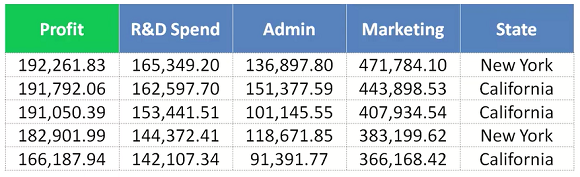

* Now we're talking about dummy variables.

* Basically the information that we have is;

  * The profit of each company or of each startup
  * The R&D spend 
  * The admin spend 
  * The marketing spend, So those three are expenses that the company incurred.
  * The state in which it operates either in York or California.

## <font color=blue>Multiple Linear Regression Intiution-Step 3</font> 